# Testing Report
### Key Metrics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
date_time = '2022-09-26_17.07.08'
log_file = f'logs/{date_time}.csv'

header_info = pd.read_csv(log_file, nrows=0)
print('Reading test log with Settings:')
for col in header_info.columns:
  print(' ', col)

Reading test log with Settings:
  Duration: 30
  Cameras: 3
  Stitching Algorithm: Homography


### Sample Images

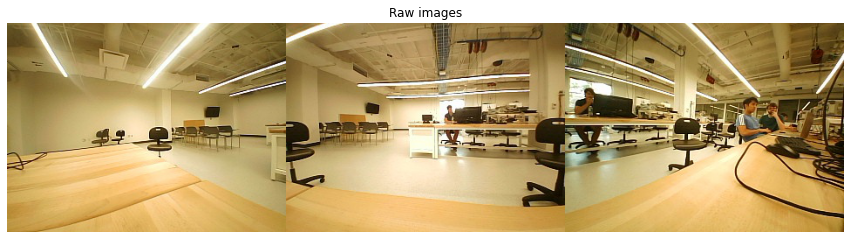

In [3]:
num_cameras = int(header_info.columns[1][-1])

from PIL import Image
import matplotlib.pyplot as plt

frames = [np.asarray(Image.open(f'logs/{date_time}_frame{i}.jpg')) for i in range(num_cameras)]

plt.rcParams['figure.figsize'] = [15, 10]
plt.axis('off')
plt.title('Raw images')
plt.imshow(np.concatenate(frames, axis=1));

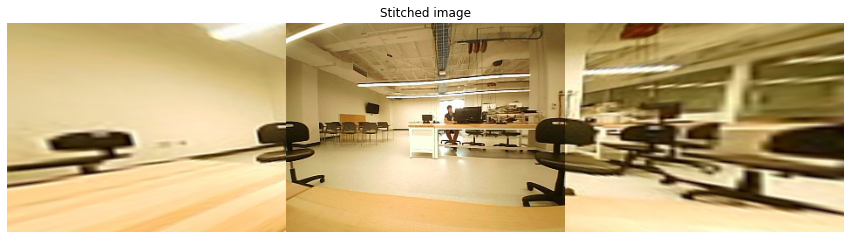

In [4]:
plt.axis('off')
plt.title('Stitched image')
plt.imshow(np.asarray(Image.open(f'logs/{date_time}_stitched.jpg')));

In [5]:
df = pd.read_csv(log_file, skiprows=[0])
df.head()

,Start Time,End Time,Status
0,1611.178659,1611.199747,0
1,1611.224962,1611.244671,0
2,1611.289771,1611.312466,0
3,1611.356953,1611.376992,0
4,1611.424957,1611.452870,0


### Successful Stitch Times

In [6]:
successful_stitches = df[df['Status'] == 0]
successful_stitches.head()

,Start Time,End Time,Status
0,1611.178659,1611.199747,0
1,1611.224962,1611.244671,0
2,1611.289771,1611.312466,0
3,1611.356953,1611.376992,0
4,1611.424957,1611.452870,0


In [7]:
stitch_times = successful_stitches['End Time'] - successful_stitches['Start Time']
print("Successful Stitch Time Statistics")
stitch_times.describe()

Successful Stitch Time Statistics


count    459.000000
mean       0.020250
std        0.001594
min        0.017586
25%        0.019083
50%        0.020140
75%        0.020998
max        0.030847
dtype: float64

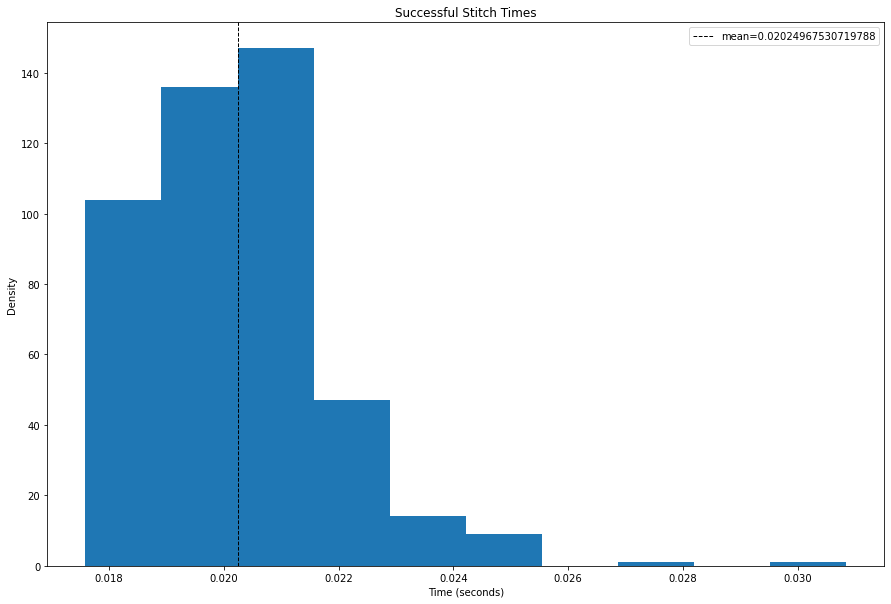

In [8]:
mean = np.mean(stitch_times)

plt.hist(stitch_times)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1,label=('mean='+str(mean)))
plt.title('Successful Stitch Times')
plt.ylabel('Density')
plt.xlabel('Time (seconds)')
plt.legend();

### Stitch Percentage

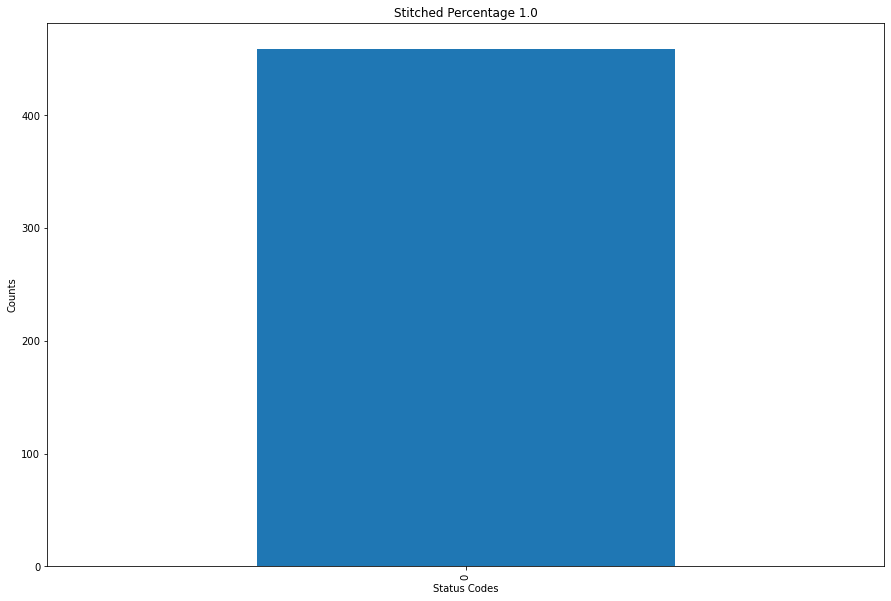

In [9]:
stitch_rate = round(successful_stitches.shape[0] / df.shape[0], 2)
stitch_rate

vc = df['Status'].value_counts().sort_index()
vc.plot(kind='bar')
plt.xlabel('Status Codes')
plt.ylabel('Counts')
plt.title(f'Stitched Percentage {stitch_rate}');